# Basic gates in measurement-based quantum computation (MBQC)

In [1]:
import deepquantum as dq
import numpy as np

## Single-qubit operation $HR_z(-\alpha)|+\rangle$

Matrix representation for $R_z(\alpha)$ and $|+>$ state
$$ R_z(\alpha) =
\begin{pmatrix}
e^{-i\alpha/2} & 0 \\
0              & e^{i\alpha/2}
\end{pmatrix}\\
|+> = \frac{\sqrt{2}}{2} \begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
$$

$$ R_z(\alpha)|+> =
\frac{\sqrt{2}}{2} \begin{pmatrix}
e^{-i\alpha/2} \\
e^{i\alpha/2} \\
\end{pmatrix}
$$

The following circuits are equivalent

![MBQC example](./figure/basic_gate_MBQC/RZ.jpg)
<div style="text-align:center">图 1: MBQC实现单比特门 $HR_z(-\alpha)|+\rangle$ 操作</div>

The probability of deferred measurement to get "1" is 0.49999991059303284.
tensor([[ 8.6603e-01+2.9802e-08j, -1.4901e-08+5.0000e-01j]])
tensor([[ 8.6603e-01+2.9802e-08j, -1.4901e-08+5.0000e-01j]])


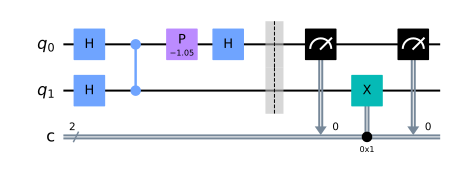

In [2]:
# define the angle of Rz gate
alpha = np.pi / 3
cir = dq.QubitCircuit(2)

# prepare cluster state
cir.h(0)
cir.h(1)
cir.cz(0, 1)

# |alpha> basis: apply phase shift and Hadamard gate
cir.p(0, -alpha)
cir.h(0)
cir.barrier()

cir.x(1, controls=0, condition=True)

cir()

# check the output state
state, measure_rst, prob = cir.defer_measure(with_prob=True)
# MBQC has an extra global phase: np.exp(-1j * alpha / 2)
print(state * np.exp(1j * alpha / 2))
print(cir.post_select(measure_rst) * np.exp(1j * alpha / 2)) # choose measurement result

cir.draw()

Verify single qubit operation $HR_z(-\alpha)|+\rangle$ in the circuit-based quantum computation (CBCQ)

tensor([[0.8660+0.0000j],
        [0.0000+0.5000j]])


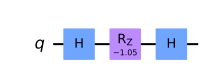

In [3]:
cir = dq.QubitCircuit(1)
# prepare state |+>
cir.h(0)

# apply Rz and Hadamard gate
cir.rz(0, -alpha)
cir.h(0)

print(cir())
cir.draw()

## Random single-qubit-rotation gate

对于任意单比特门的实现，采用三个H-Rz gate级联的形式，最后根据测量结果加上对应的Pauli修正

![MBQC example](./figure/basic_gate_MBQC/Single.jpg)
<div style="text-align:center">图 2: MBQC single gate 的实现</div>

The probability of deferred measurement to get "001" is 0.12499997019767761.
tensor([[0.3314+0.4619j, 0.1913+0.8001j]])
tensor([[0.3314+0.4619j, 0.1913+0.8001j]])


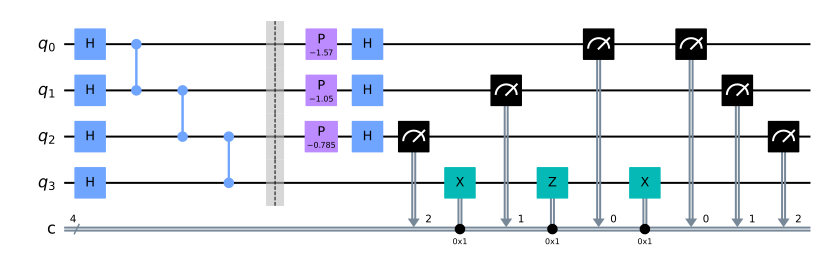

In [4]:
alpha = np.pi / 2
beta  = np.pi / 3
gamma = np.pi / 4
cir = dq.QubitCircuit(4)

# prepare cluster state
cir.hlayer()
cir.cz(0, 1)
cir.cz(1, 2)
cir.cz(2, 3)
cir.barrier()

# measurement
cir.p(0, -alpha)
cir.h(0)
cir.p(1, -beta)
cir.h(1)
cir.p(2, -gamma)
cir.h(2)

cir.x(3, controls=2, condition=True)
cir.z(3, controls=1, condition=True)
cir.x(3, controls=0, condition=True)
cir()

state, measure_rst, prob = cir.defer_measure(with_prob=True)
print(state * np.exp(1j * (alpha + beta + gamma) / 2))
print(cir.post_select(measure_rst) * np.exp(1j * (alpha + beta + gamma) / 2)) # choose measurement result

cir.draw()

Verify random single-qubit-rotation gate  in circuit based quantum computation(CBQC)

tensor([[0.3314+0.4619j],
        [0.1913+0.8001j]])


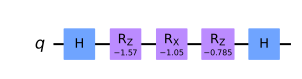

In [5]:
# verify
cir = dq.QubitCircuit(1)
cir.h(0)

# alpha, beta, gamma系数的正负是根据测量结果决定的
# q0的结果对应rx门的beta系数的正负
# q1的结果对应第二个rz门的gamma系数的正负
# alpha始终保持不变

cir.rz(0, -alpha)
cir.rx(0, beta * (-1) ** (int(measure_rst[0]) + 1))
cir.rz(0, gamma * (-1) ** (int(measure_rst[1]) + 1))
cir.h(0)

print(cir())
cir.draw()

## CNOT gate

Matrix representation for CNOT gate
$$ CNOT=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
= |0><0| \otimes I + |1><1| \otimes X
$$

$$
CNOT|++>=|++> \\
CNOT|+->=|--> \\
CNOT|-+>=|-+> \\
CNOT|-->=|+->
$$

![MBQC example](./figure/basic_gate_MBQC/CNOT.jpg)
<div style="text-align:center">图 3: MBQC CNOT 的实现</div>

The probability of deferred measurement to get "10" is 0.24999994039535522.
tensor([[0.5000+0.j, 0.5000+0.j, 0.5000+0.j, 0.5000+0.j]])
tensor([[0.5000+0.j, 0.5000+0.j, 0.5000+0.j, 0.5000+0.j]])


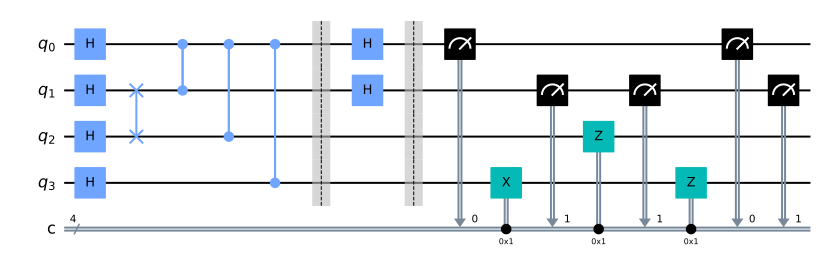

In [6]:
cir = dq.QubitCircuit(4)

# construct cluster state
# cir.x(1)  # input |->|+> state
# cir.x(2)  # input |+>|-> state

cir.hlayer()
cir.swap([1,2])
cir.cz(0, 1)
cir.cz(0, 2)
cir.cz(0, 3)
cir.barrier()

# measurement
cir.h(0)
cir.h(1)
cir.barrier()

cir.x(3, controls=0, condition=True)
cir.z(2, controls=1, condition=True)
cir.z(3, controls=1, condition=True)

cir()

state, measure_rst, prob = cir.defer_measure(with_prob=True)
print(state)
print(cir.post_select(measure_rst)) # choose measurement result

cir.draw()

Verify CNOT gate in circuit-based quantum computation (CBQC)

tensor([[0.5000+0.j],
        [0.5000+0.j],
        [0.5000+0.j],
        [0.5000+0.j]])


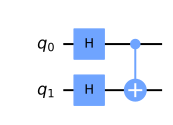

In [7]:
cir = dq.QubitCircuit(2)
# cir.x(0)
# cir.x(1)

cir.hlayer()
cir.cx(0, 1)
print(cir())
cir.draw()